In [4]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wrangle as w

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
reload(w)
train, validate, test = w.split_queens(w.acquire_rpdr_data())
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           801 non-null    int64         
 1   queen_name       801 non-null    object        
 2   age              801 non-null    int64         
 3   dob              801 non-null    datetime64[ns]
 4   city             801 non-null    category      
 5   state            801 non-null    category      
 6   winner           801 non-null    bool          
 7   rank             801 non-null    int64         
 8   ms_congeniality  801 non-null    bool          
 9   episode          801 non-null    int64         
 10  outcome          801 non-null    category      
 11  minichalw        801 non-null    bool          
 12  etype            801 non-null    category      
 13  air_date         801 non-null    datetime64[ns]
 14  nickname         801 non-null    object   

<AxesSubplot: ylabel='Frequency'>

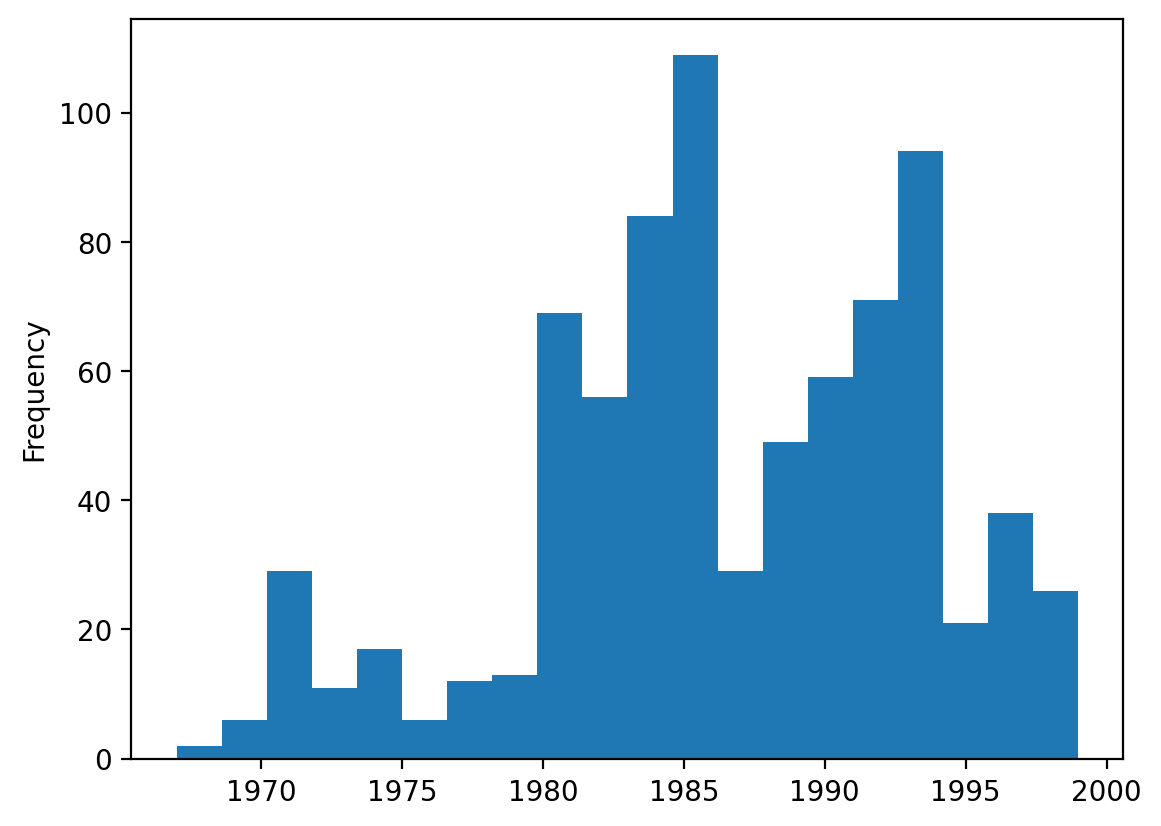

In [12]:
train.dob.dt.year.plot.hist(bins=20)